# Importando base de dados

In [2]:
import pandas as pd

In [3]:
dados = pd.read_csv('../tips.csv')
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [4]:
dados.shape

(244, 6)

# Tradução

In [5]:
renomear ={
    'total_bill' : 'valor_da_conta', 
    'tip': 'gorjeta', 
    'dessert' : 'sobremesa', 
    'day': 'dia_da_semana', 
    'time': 'hora_do_dia', 
    'size': 'total_de_pessoas'
}

In [6]:
gorjetas = dados.rename(columns=renomear)

In [7]:
gorjetas['sobremesa'].value_counts()

No     151
Yes     93
Name: sobremesa, dtype: int64

In [8]:
mapear_sobremesa = {
    'No':'Não',
    'Yes':'Sim'
}
gorjetas['sobremesa'] = gorjetas['sobremesa'].map(mapear_sobremesa)

In [9]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Sun,Dinner,2
1,10.34,1.66,Não,Sun,Dinner,3
2,21.01,3.50,Não,Sun,Dinner,3
3,23.68,3.31,Não,Sun,Dinner,2
4,24.59,3.61,Não,Sun,Dinner,4


In [10]:
gorjetas.dia_da_semana.value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: dia_da_semana, dtype: int64

In [11]:
gorjetas.hora_do_dia.value_counts()

Dinner    176
Lunch      68
Name: hora_do_dia, dtype: int64

In [12]:
mapear_dia_da_semana = {
    'Sat':'sabado',
    'Sun': 'domingo',
    'Thur': 'quinta',
    'Fri': 'quinta'
}

mapear_hora_do_dia = {
    'Dinner': 'jantar',
    'Lunch': 'almoço'
}

gorjetas['dia_da_semana'] = gorjetas['dia_da_semana'].map(mapear_dia_da_semana)
gorjetas['hora_do_dia'] = gorjetas['hora_do_dia'].map(mapear_hora_do_dia)

In [13]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,domingo,jantar,2
1,10.34,1.66,Não,domingo,jantar,3
2,21.01,3.50,Não,domingo,jantar,3
3,23.68,3.31,Não,domingo,jantar,2
4,24.59,3.61,Não,domingo,jantar,4


In [14]:
import seaborn as sns

In [15]:
pip show seaborn

Name: seaborn
Version: 0.12.0
Summary: Statistical data visualization
Home-page: 
Author: 
Author-email: Michael Waskom <mwaskom@gmail.com>
License: 
Location: c:\users\rivaldo junior\appdata\local\packages\pythonsoftwarefoundation.python.3.10_qbz5n2kfra8p0\localcache\local-packages\python310\site-packages
Requires: matplotlib, numpy, pandas
Required-by: missingno
Note: you may need to restart the kernel to use updated packages.


# Primeira análise: Valor da conta e da gorjeta.

<AxesSubplot:xlabel='valor_da_conta', ylabel='gorjeta'>

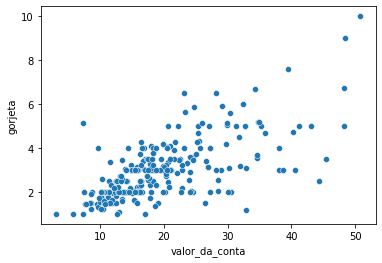

In [16]:
sns.scatterplot(x = 'valor_da_conta', y = 'gorjeta', data = gorjetas)


**Visualmente, o valor da gorjeta aumenta conforme aumenta o valor da conta**

In [17]:
gorjetas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   valor_da_conta    244 non-null    float64
 1   gorjeta           244 non-null    float64
 2   sobremesa         244 non-null    object 
 3   dia_da_semana     244 non-null    object 
 4   hora_do_dia       244 non-null    object 
 5   total_de_pessoas  244 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 11.6+ KB


### Criando o campo porcentagem.

In [18]:
gorjetas['porcentagem'] = (gorjetas['gorjeta'] / gorjetas['valor_da_conta']).round(2)

In [19]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,domingo,jantar,2,0.06
1,10.34,1.66,Não,domingo,jantar,3,0.16
2,21.01,3.50,Não,domingo,jantar,3,0.17
3,23.68,3.31,Não,domingo,jantar,2,0.14
4,24.59,3.61,Não,domingo,jantar,4,0.15


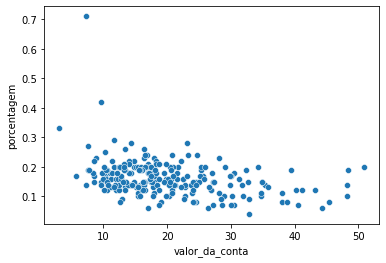

In [20]:
porcentagem_conta = sns.scatterplot( x = 'valor_da_conta', y = 'porcentagem', data = gorjetas)



**Pelo gráfico, é possível observar que o valor da gorjeta não aumenta proporcionalmente em relação a gorjeta.**

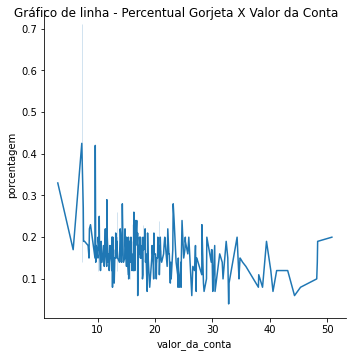

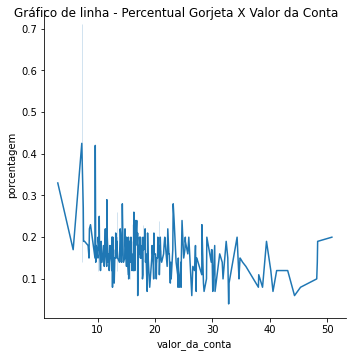

In [25]:
porcentagem_conta_linha = sns.relplot(x = 'valor_da_conta', y = 'porcentagem', data = gorjetas, kind = 'line')
porcentagem_conta_linha.figure.suptitle('Gráfico de linha - Percentual Gorjeta X Valor da Conta')
porcentagem_conta_linha.figure.get_figure()

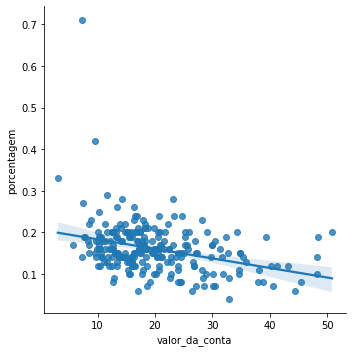

In [23]:
sns.lmplot(x = 'valor_da_conta', y = 'porcentagem', data = gorjetas)

### Analise 2 - Sobremesa

In [28]:
gorjetas[gorjetas['sobremesa'] == 'Sim'].describe().round(0)

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,93.0,93.0,93.0,93.0
mean,21.0,3.0,2.0,0.0
std,10.0,1.0,1.0,0.0
min,3.0,1.0,1.0,0.0
25%,13.0,2.0,2.0,0.0
50%,18.0,3.0,2.0,0.0
75%,27.0,4.0,3.0,0.0
max,51.0,10.0,5.0,1.0


In [29]:
gorjetas[gorjetas['sobremesa'] == 'Não'].describe().round(0)

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,151.0,151.0,151.0,151.0
mean,19.0,3.0,3.0,0.0
std,8.0,1.0,1.0,0.0
min,7.0,1.0,1.0,0.0
25%,13.0,2.0,2.0,0.0
50%,18.0,3.0,2.0,0.0
75%,23.0,4.0,3.0,0.0
max,48.0,9.0,6.0,0.0


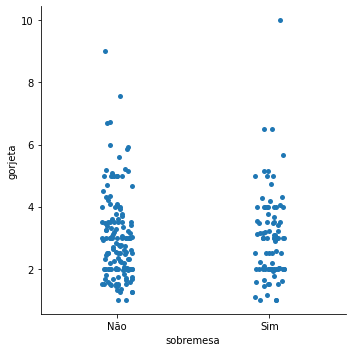

In [30]:
sns.catplot(x = 'sobremesa', y = 'gorjeta', data=gorjetas)

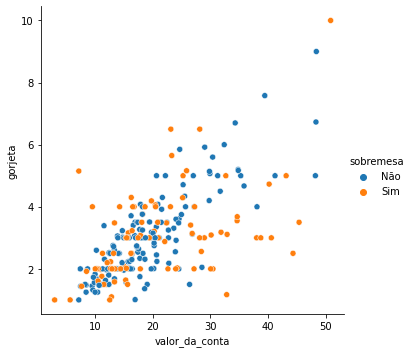

In [31]:
sns.relplot(x = 'valor_da_conta', y = 'gorjeta', hue='sobremesa', data=gorjetas)

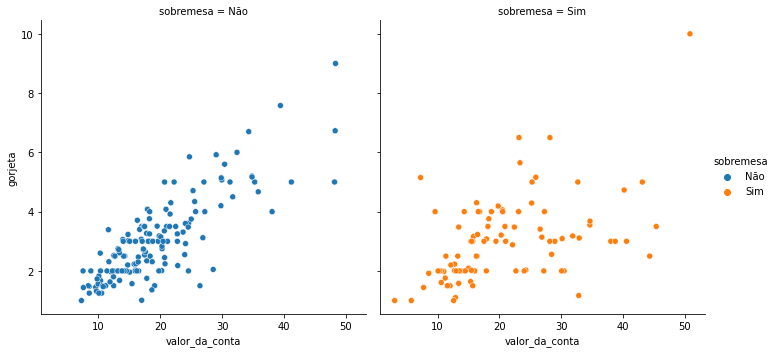

In [32]:
sns.relplot(x = 'valor_da_conta', y = 'gorjeta', hue='sobremesa', data=gorjetas, col='sobremesa')

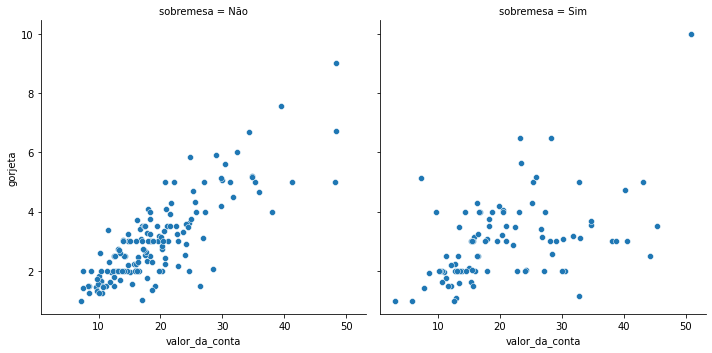

In [33]:
sns.relplot(x = 'valor_da_conta', y = 'gorjeta', data=gorjetas, col='sobremesa')

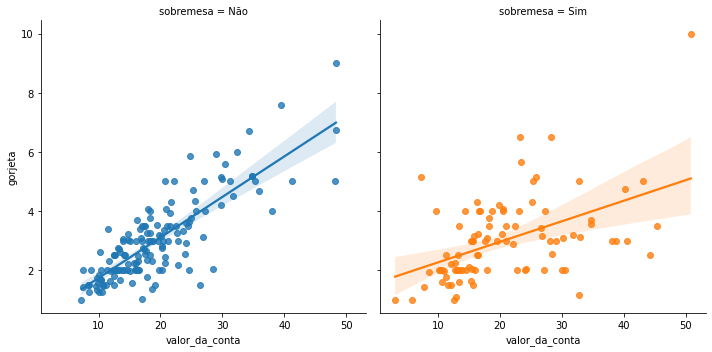

In [34]:
sns.lmplot(x = 'valor_da_conta', y = 'gorjeta', hue='sobremesa', data=gorjetas, col='sobremesa')

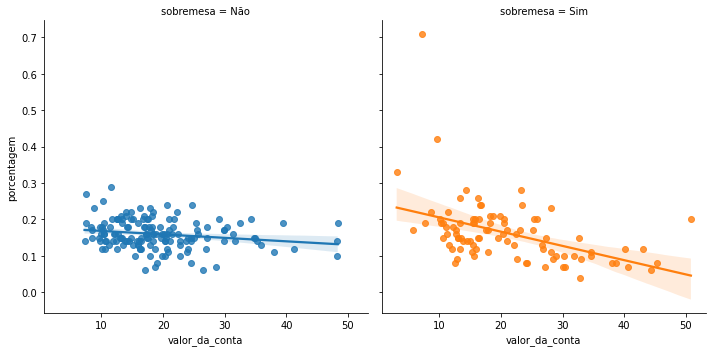

In [36]:
sns.lmplot(x = 'valor_da_conta', y = 'porcentagem', hue='sobremesa', data=gorjetas, col='sobremesa')

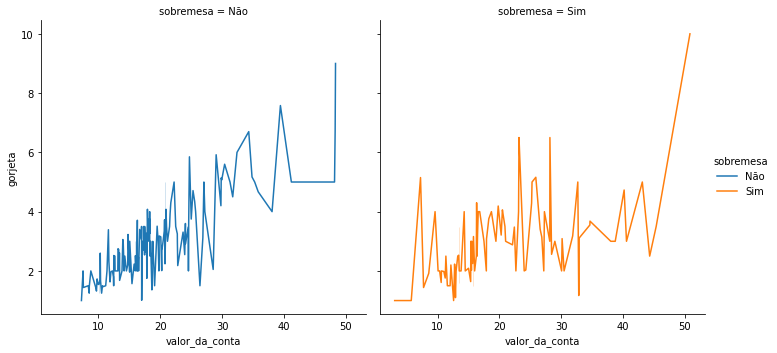

In [37]:
sns.relplot(x = 'valor_da_conta', y = 'gorjeta', hue='sobremesa', data=gorjetas, col='sobremesa', kind='line')

### Teste de Hipotese

**H<sup>null</sup>**


In [38]:
from scipy.stats import ranksums

In [39]:
sobremesa = gorjetas.query("sobremesa == 'Sim'").porcentagem
sem_sobremesa = gorjetas.query("sobremesa == 'Não'").porcentagem

In [44]:
r = ranksums(sobremesa, sem_sobremesa)

print(f'O valor do p.value é: {r[1]}')

O valor do p.value é: 0.5266635660124415
